Try to simulate an experiment with some averages

In [30]:
from client import mylogger
from instrument import Marcj
import time
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Instrument and experiment setup

inst = Marcj("JJ")
inst.connect()

freqs = [500]
ampls = [3]
averages = 10
acq_time = 0.03

precision = (2**24)/2 - 1

In [32]:
# Run experiment

full_data = []

for f in freqs:
    for a in ampls:
        inst.set_frequency(f)
        inst.set_amplitude(a)
        inst.set_wave("TRIA")

        inst.play("CONT")

        for _ in range(averages):
            acquired_data = inst.read_signal(acq_time)
            ch0, ch1 = np.array(acquired_data["ch0"]), np.array(acquired_data["ch1"])

            try:
                data_0 += ch0
                data_1 += ch1
            except:
                data_0 = ch0
                data_1 = ch1

            time.sleep(0.1)

        data_dict = {
                "frequency": f,
                "amplitude": a,
                "ch0": data_0/averages,
                "ch1": data_1/averages
            }

        full_data.append(data_dict)

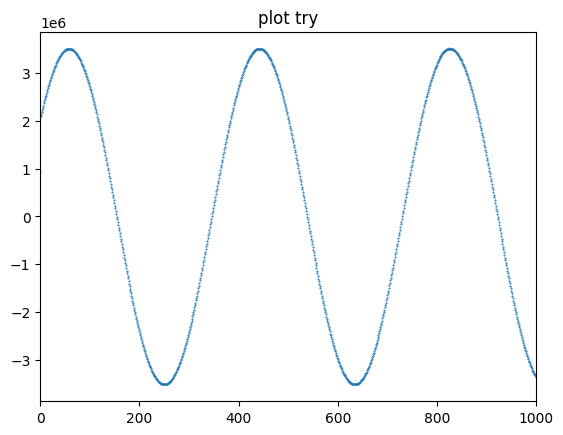

In [33]:
fig, ax = plt.subplots()
ax.set_title("plot try")
ax.plot(full_data[0]["ch0"], 'o', markersize = .5)
ax.set_xlim(0, 1000);